# l1 and l2

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics

In [10]:
import warnings

warnings.filterwarnings("ignore")

In [11]:
bostan_dataset= datasets.load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [8]:
boston_df=pd.DataFrame(bostan_dataset.data)
boston_df

NameError: name 'bostan_dataset' is not defined

In [6]:
boston_df.columns=bostan_dataset.feature_names

In [18]:

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bostan_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
boston_np_target_col=np.asarray(bostan_dataset.target)
boston_np_target_col

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
boston_df["House_price"]=pd.Series(boston_np_target_col)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
predictors=boston_df.iloc[:,:-1]
predictors

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [13]:
response=boston_df.iloc[:,-1]
response 

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: House_price, Length: 506, dtype: float64

In [16]:
predictors.shape

(506, 13)

In [14]:
X_Train, X_Test, Y_Train, Y_Test=train_test_split(predictors,response,test_size=0.25,random_state=100)

In [15]:
X_Train.shape

(379, 13)

In [17]:
X_Test.shape

(127, 13)

# Linear Regression

In [20]:
linear_reg_model=LinearRegression()

linear_reg_model.fit(X_Train,Y_Train)

linear_reg_pred=linear_reg_model.predict(X_Test)

In [22]:
linear_reg_pred

array([34.32560931, 31.2633507 , 22.28003335, 17.86975069, 20.40606949,
       25.91303352, 26.15242179, 23.66375418, 22.30169002, 19.59234366,
       26.75489062, 17.29420545, 20.80817579, 15.46781924, 41.69247941,
       20.16746428, 28.77029186, 19.02021072, 32.38988683, 40.43872985,
       35.04799251, 16.83853764, 20.33053373, 18.09797446, 13.80644424,
       12.41884725, 27.47062888, 20.40507455, 18.75428942, 20.25662126,
       15.46268828, 24.40432932, 39.15237132, 24.76295642, 31.78210045,
       28.38346572, 15.00749275, 14.45446654, 16.73702223, 23.29876692,
       22.95875889, 23.59744316, 13.77412361, 21.39735646, 31.29998733,
       26.66234266, 19.32157368, 15.87491845, 17.2294449 , 12.65256962,
       21.71569722, 20.1686083 , 23.61536492, 24.10587542, 11.97825659,
       14.74341261, 24.86442941, 34.10640748, 10.12033231, 20.89367197,
       17.54551737, 19.5997927 , 17.74536973, 30.04265302, 21.0171677 ,
       25.35489057, 15.73563341, 25.06394771, 22.10298887, 20.65

In [32]:
metrics.r2_score(Y_Test,linear_reg_pred)

0.7246154314616737

In [34]:
linear_reg_model.score(X_Test,Y_Test)

0.7246154314616737

In [36]:
linear_reg_model.score(X_Train,Y_Train)
# r2 stats for training

0.7421573768304616

In [23]:
R_square=r2_score(Y_Test,linear_reg_pred)
print("r2 Square on the test is ",R_square)

r2 Square on the test is  0.7246154314616737


In [35]:
def adj_r2(x,y):
    r2 = linear_reg_model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    print(p)
    print(n)
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
adj_r2(X_Test,Y_Test)

13
127


0.6929340209218662

In [28]:
X_Train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [29]:
linear_reg_model.coef_

array([-7.91941832e-02,  4.57346937e-02, -1.91618498e-02,  2.42425004e+00,
       -1.37566386e+01,  3.85295127e+00, -1.32030023e-02, -1.48241647e+00,
        2.96989765e-01, -1.31667310e-02, -9.20210891e-01,  1.08903562e-02,
       -4.52953748e-01])

In [30]:
coff_lg=pd.DataFrame()
coff_lg["Col_name"]=X_Train.columns
coff_lg["coff_values"]=pd.Series(linear_reg_model.coef_)
coff_lg

,Col_name,coff_values
0,CRIM,-0.079194
1,ZN,0.045735
2,INDUS,-0.019162
3,CHAS,2.424250
4,NOX,-13.756639
5,RM,3.852951
6,AGE,-0.013203
7,DIS,-1.482416
8,RAD,0.296990
9,TAX,-0.013167


<BarContainer object of 13 artists>

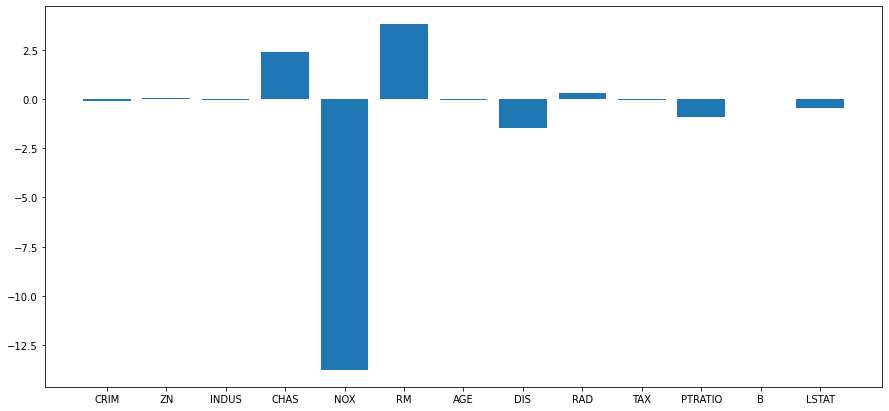

In [31]:
plt.rcParams["figure.figsize"]=(15,7)
plt.bar(coff_lg["Col_name"],coff_lg["coff_values"])

# Ridge

r2 Square on the test is for ridge  0.7196188929976585
   Col_name  coff_values
0      CRIM    -0.076266
1        ZN     0.046561
2     INDUS    -0.035202
3      CHAS     2.391980
4       NOX    -9.532840
5        RM     3.865038
6       AGE    -0.017141
7       DIS    -1.422035
8       RAD     0.287174
9       TAX    -0.013628
10  PTRATIO    -0.877152
11        B     0.011107
12    LSTAT    -0.457572


<BarContainer object of 13 artists>

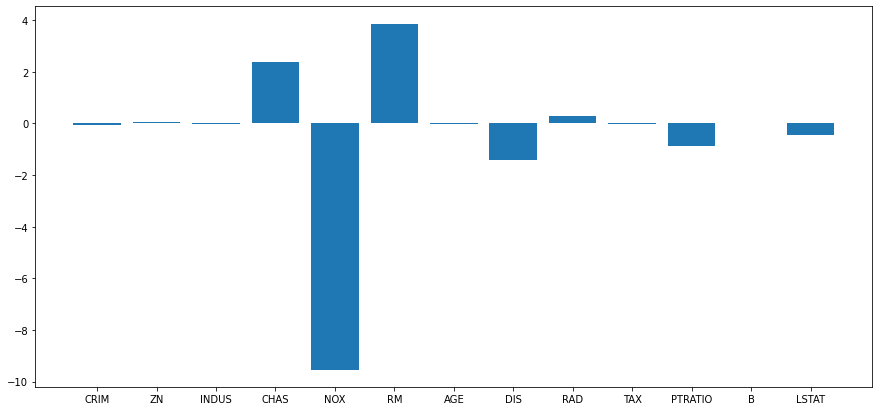

In [41]:
ridge_reg=Ridge(alpha=0.5)

ridge_reg.fit(X_Train,Y_Train)

y_pred_ridge=ridge_reg.predict(X_Test)

R_square=r2_score(Y_Test,y_pred_ridge)
print("r2 Square on the test is for ridge ",R_square)


coff_ridge=pd.DataFrame()
coff_ridge["Col_name"]=X_Train.columns
coff_ridge["coff_values"]=pd.Series(ridge_reg.coef_)
print(coff_ridge)

plt.rcParams["figure.figsize"]=(15,7)
plt.bar(coff_ridge["Col_name"],coff_ridge["coff_values"])

r2 Square on the test is for ridge  0.7128042829962907
   Col_name  coff_values
0      CRIM    -0.073454
1        ZN     0.047633
2     INDUS    -0.052216
3      CHAS     2.277525
4       NOX    -4.964578
5        RM     3.843521
6       AGE    -0.021040
7       DIS    -1.356149
8       RAD     0.278504
9       TAX    -0.014216
10  PTRATIO    -0.832465
11        B     0.011318
12    LSTAT    -0.465326


<BarContainer object of 13 artists>

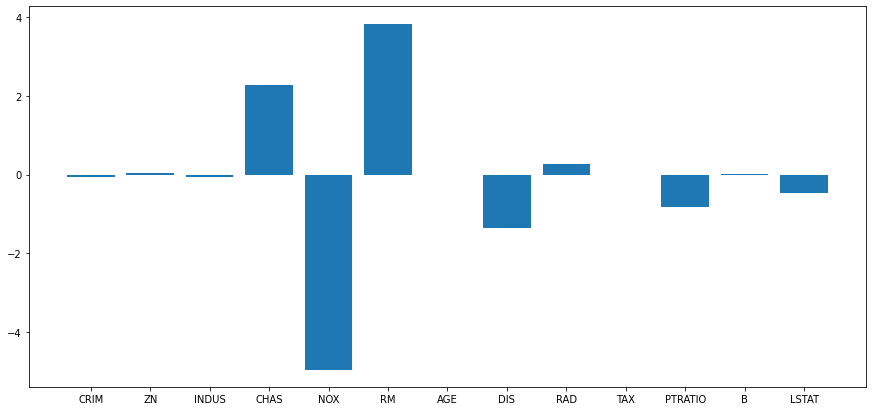

In [42]:
ridge_reg=Ridge(alpha=2)

ridge_reg.fit(X_Train,Y_Train)

y_pred_ridge=ridge_reg.predict(X_Test)

R_square=r2_score(Y_Test,y_pred_ridge)
print("r2 Square on the test is for ridge ",R_square)


coff_ridge=pd.DataFrame()
coff_ridge["Col_name"]=X_Train.columns
coff_ridge["coff_values"]=pd.Series(ridge_reg.coef_)
print(coff_ridge)¯

plt.rcParams["figure.figsize"]=(15,7)
plt.bar(coff_ridge["Col_name"],coff_ridge["coff_values"])

r2 Square on the test is for ridge  0.7107463113545327
   Col_name  coff_values
0      CRIM    -0.072922
1        ZN     0.048022
2     INDUS    -0.056512
3      CHAS     2.202650
4       NOX    -3.763476
5        RM     3.816531
6       AGE    -0.021845
7       DIS    -1.338410
8       RAD     0.277370
9       TAX    -0.014422
10  PTRATIO    -0.821826
11        B     0.011360
12    LSTAT    -0.469047


<BarContainer object of 13 artists>

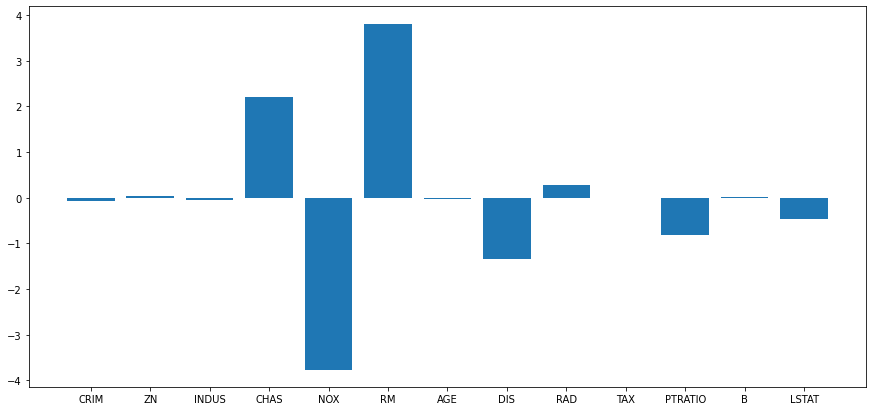

In [45]:
ridge_reg=Ridge(alpha=3)

ridge_reg.fit(X_Train,Y_Train)

y_pred_ridge=ridge_reg.predict(X_Test)

R_square=r2_score(Y_Test,y_pred_ridge)
print("r2 Square on the test is for ridge ",R_square)


coff_ridge=pd.DataFrame()
coff_ridge["Col_name"]=X_Train.columns
coff_ridge["coff_values"]=pd.Series(ridge_reg.coef_)
print(coff_ridge)

plt.rcParams["figure.figsize"]=(15,7)
plt.bar(coff_ridge["Col_name"],coff_ridge["coff_values"])

# Lasso

r2 Square on the test is for ridge  0.6901728663720312
   Col_name  coff_values
0      CRIM    -0.053502
1        ZN     0.051242
2     INDUS    -0.019285
3      CHAS     0.000000
4       NOX    -0.000000
5        RM     2.438206
6       AGE    -0.002042
7       DIS    -0.944672
8       RAD     0.292116
9       TAX    -0.017123
10  PTRATIO    -0.757492
11        B     0.010325
12    LSTAT    -0.591247


<BarContainer object of 13 artists>

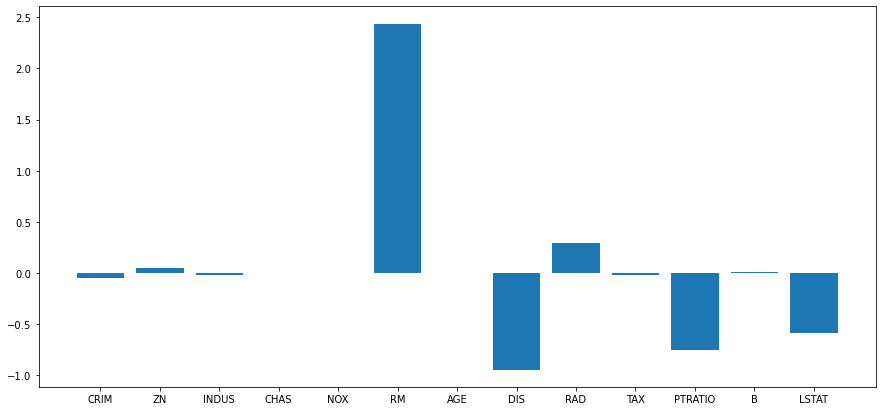

In [47]:
lasso_reg=Lasso(alpha=0.5)

lasso_reg.fit(X_Train,Y_Train)

pred_lasso_reg=lasso_reg.predict(X_Test)

R_square=r2_score(Y_Test,pred_lasso_reg)
print("r2 Square on the test is for ridge ",R_square)

coff_lasso=pd.DataFrame()
coff_lasso["Col_name"]=X_Train.columns
coff_lasso["coff_values"]=pd.Series(lasso_reg.coef_)
print(coff_lasso)
plt.rcParams["figure.figsize"]=(15,7)
plt.bar(coff_lasso["Col_name"],coff_lasso["coff_values"])

r2 Square on the test is for ridge  0.5984945500645935
   Col_name  coff_values
0      CRIM    -0.000000
1        ZN     0.040812
2     INDUS    -0.000000
3      CHAS     0.000000
4       NOX     0.000000
5        RM     0.000000
6       AGE     0.038758
7       DIS    -0.014778
8       RAD     0.206600
9       TAX    -0.014151
10  PTRATIO    -0.525799
11        B     0.007112
12    LSTAT    -0.760744


<BarContainer object of 13 artists>

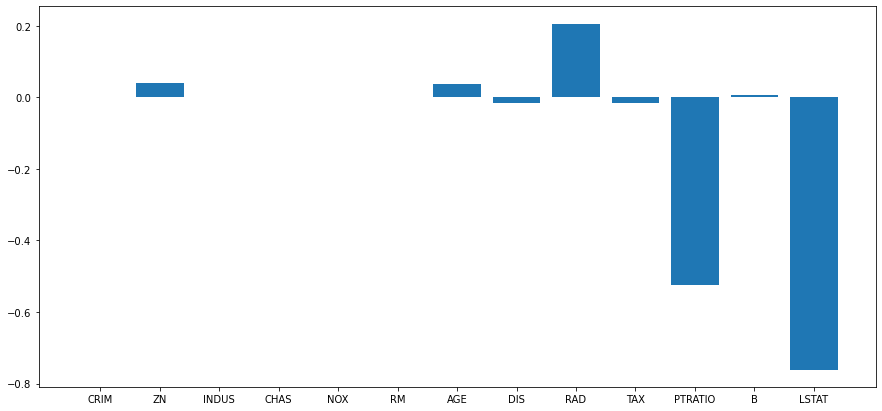

In [48]:
lasso_reg=Lasso(alpha=2)

lasso_reg.fit(X_Train,Y_Train)
pred_lasso_reg=lasso_reg.predict(X_Test)

R_square=r2_score(Y_Test,pred_lasso_reg)
print("r2 Square on the test is for ridge ",R_square)

coff_lasso=pd.DataFrame()
coff_lasso["Col_name"]=X_Train.columns
coff_lasso["coff_values"]=pd.Series(lasso_reg.coef_)
print(coff_lasso)
plt.rcParams["figure.figsize"]=(15,7)
plt.bar(coff_lasso["Col_name"],coff_lasso["coff_values"])

# Polynomial Regression

In [49]:
dataset=pd.read_csv(r"Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [50]:
x=dataset.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [51]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [52]:
linear_reg_plain=LinearRegression()

In [53]:
linear_reg_plain.fit(x,y)

LinearRegression()

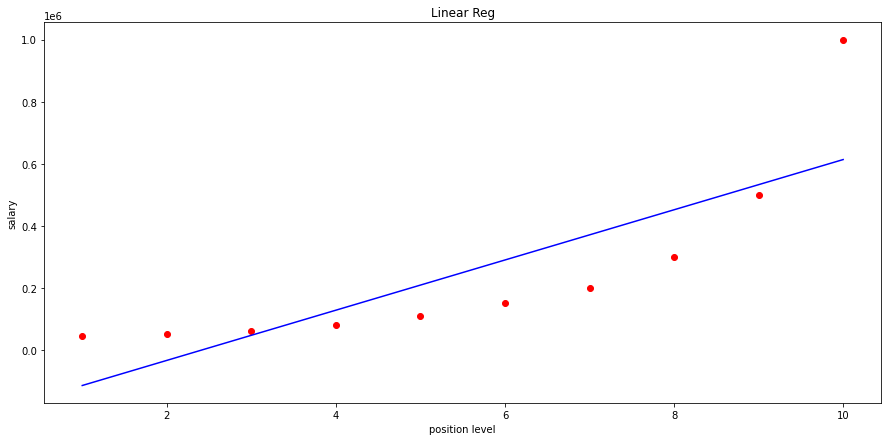

In [54]:
plt.scatter(x,y,color="red")
plt.plot(x,linear_reg_plain.predict(x),color="blue")
plt.title("Linear Reg")
plt.xlabel("position level")
plt.ylabel("salary")
plt.show()

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
ploy_reg=PolynomialFeatures(degree=2)


In [58]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [57]:
X_ploy=ploy_reg.fit_transform(x)
X_ploy

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

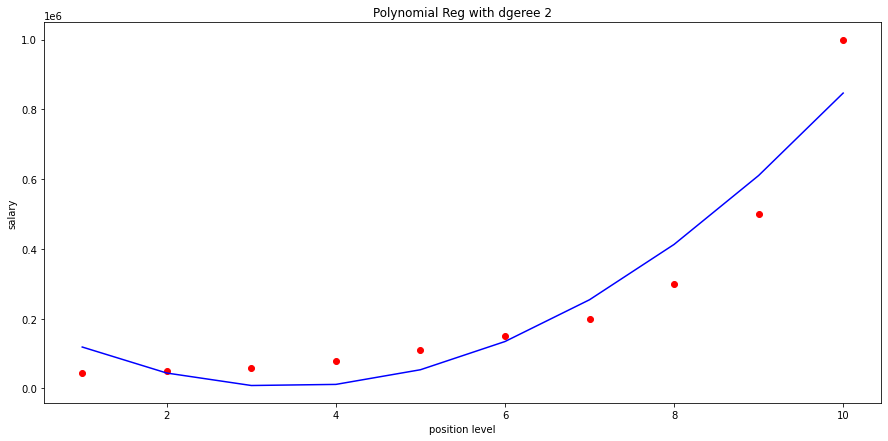

In [59]:
linear_reg_2=LinearRegression()

linear_reg_2.fit(X_ploy,y)

plt.scatter(x,y,color="red")
plt.plot(x,linear_reg_2.predict(X_ploy),color="blue")
plt.title("Polynomial Reg with dgeree 2")
plt.xlabel("position level")
plt.ylabel("salary")
plt.show()

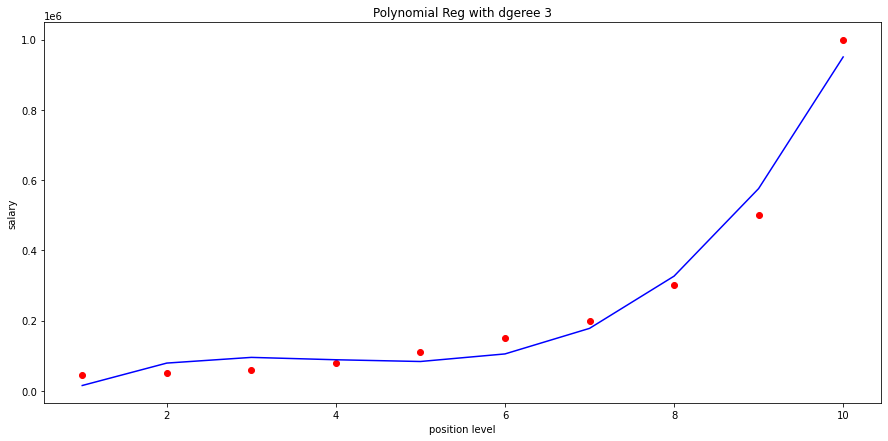

In [60]:
ploy_reg=PolynomialFeatures(degree=3)


X_ploy_3=ploy_reg.fit_transform(x)






linear_reg_3=LinearRegression()

linear_reg_3.fit(X_ploy_3,y)

plt.scatter(x,y,color="red")
plt.plot(x,linear_reg_3.predict(X_ploy_3),color="blue")
plt.title("Polynomial Reg with dgeree 3")
plt.xlabel("position level")
plt.ylabel("salary")
plt.show()

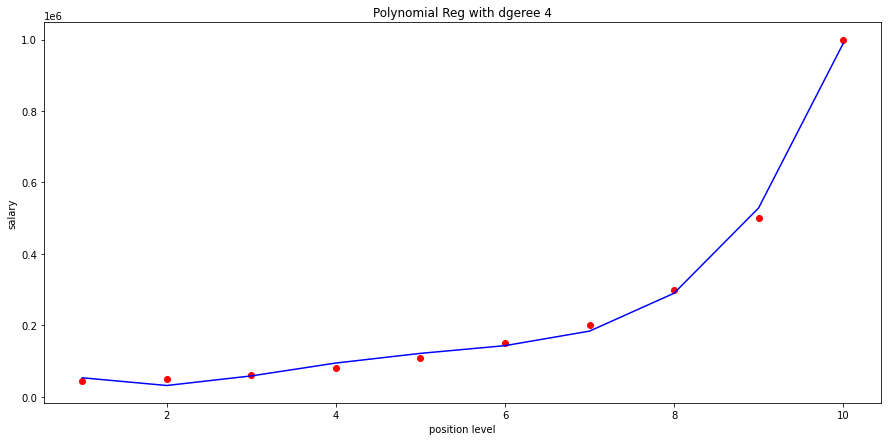

In [61]:
ploy_reg=PolynomialFeatures(degree=4)


X_ploy_4=ploy_reg.fit_transform(x)






linear_reg_4=LinearRegression()

linear_reg_4.fit(X_ploy_4,y)

plt.scatter(x,y,color="red")
plt.plot(x,linear_reg_4.predict(X_ploy_4),color="blue")
plt.title("Polynomial Reg with dgeree 4")
plt.xlabel("position level")
plt.ylabel("salary")
plt.show()

In [63]:
X_ploy_3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [62]:
X_ploy_4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])